# Линейная классификация

[*Задача классификации*](https://en.wikipedia.org/wiki/Statistical_classification) заключается в присвоении объекту некоторого класса. В зависимости от количества классов различают [*бинарную классификацию*](https://en.wikipedia.org/wiki/Binary_classification) и [*многоклассовую классификацию*](https://en.wikipedia.org/wiki/Multiclass_classification). 

В первом случае, необходимо отнести объект к одному из двух классов. Примерами таких задач могут служить *оценка кредитоспособности заемщика* (0 - "хороший", т.е. будет погашать свой долг вовремя либо 1 - "плохой", часто попадающий в просрочку), *оценка состояния здоровья пациента* (0 - здоров, 1 - болен), *определить содержит ли фотография изображение автомобиля или нет* и многие другие.

Вторая группа задач заключается в отнесении объекта к трем и более классам. Например, *определение марки автомобиля* по заданным характеристикам, *жанра кинофильма* или *времени года по фотографии* и т.п. 

Задача классификации является [*задачей обучения с учителем*](https://en.wikipedia.org/wiki/Supervised_learning), что отличает ее от задачи [*кластеризации*](https://en.wikipedia.org/wiki/Cluster_analysis).  

Для решения задач классификации существуют различные алгоритмы (линейные модели, деревья решений, градиентный бустинг и другие). Данная лекция посвящена решению задачи линейной бинарной классификации.

### 1. Общее уравнение линейной классификации и постановка задачи:

Пусть имеется выборка из $n$ объектов, каждый из которых описан с помощью $m$ переменных: 

$$
\mathbf{x}_{i} = (x_{i}^{1}, \ldots, x_{i}^{m}) \in \mathbb{R}^{m}, \quad i = \overline{1, n}.
$$

Пусть, кроме того, каждому объекту соответствует некоторый ответ $y_{i} \in \{-1, 1\}$, $i = \overline{1, n}$.


Задача отыскания зависимости между значением переменной $y_{i}$ и признаками $x_{i}^{1}, \ldots, x_{i}^{m}$ в виде линейной комбинации этих признаков с некоторыми весами $w_{j}$ называется *задачей линейной классификации*. Переменная $y_{i}$ называется *зависимой* переменной (*целевая* переменная, *таргет*), а переменные $\mathbf{x}^{1}, \ldots, \mathbf{x}^{m}$ - *независимыми* переменными (*признаками*, *предикторами*, *факторами*). 


В общем виде уравнение линейной классификации выглядит следующим образом:
$$
a(\mathbf{x}_{i}) = sgn\Bigg(w_{0} + \sum\limits_{j = 1}^{m}w_{j}x_{i}^{j}\Bigg) = sgn\Bigg(w_{0} + \Big(\mathbf{w}, \mathbf{x}_{i}\Big)\Bigg), \quad i = \overline{1, n},
$$
где $w_{0}$ - свободный коэффициент (сдвиг).  

*Замечание:* На самом деле функция знака может принимать 3 значения: -1, 0 и 1. Нас же интересуют два из них: -1 и 1. Поэтому, для корректной постановки задачи, нужно либо исключить соответствующие примеры из рассмотрения, либо немного модифицировать функцию: например, выдавать значение -1 при значении аргумента равным 0.  

Если добавить еще один признак, равный $1$ на всех объектах, то получим более компактную запись уравнения линейной классификации:
$$
a(\mathbf{x}_{i}) = sgn\Big(\mathbf{w}, \mathbf{x}_{i}\Big).
$$

*Замечание:* для удобства оставили прежние названия: $\mathbf{x}_{i}$ и $\mathbf{w}$.

Решить задачу линейной классификации - значит найти коэффициенты $w_{j}, j = \overline{1, m}$, а также свободный член $w_{0}$, которые доставляют минимум функционалу ошибки $Q(a, \mathbf{X})$:

$$
Q(a, \mathbf{X}) \to \min_{a},
$$
где $\mathbf{X}$ - матрица, строками которой является векторы $\mathbf{x}_{i}$.

Заметим, что в случае линейной модели данный функционал можно переписать в виде функции $Q(\mathbf{w}, \mathbf{X})$. Тогда задача оптимизации сводится к следующей:

$$
Q(\mathbf{w}, \mathbf{X}) \to \min_{\mathbf{w}}.
$$


### 2. Понятие отступа и геометрический смысл линейного классификатора:

Основная цель задачи классификации - верно прометить как можно больше объектов. Поскольку при решении задач машинного обучения принято минимизировать функционал ошибки, то мы будем иметь дело с *долей неверно классифицированных примеров*:

$$
Q(\mathbf{w}, \mathbf{X}) = \frac{1}{n}\sum\limits_{i = 1}^{n}I_{y_{i} \neq a(\mathbf{x}_{i})} = \frac{1}{n}\sum\limits_{i = 1}^{n}I_{y_{i} \neq sgn(\mathbf{w}, \mathbf{x}_{i})},
$$
где $I$ - индикаторная функция.

У данной функции существует значительный недостаток - она не является гладкой, а следоваетльно методы градиентного спуска к ней не применимы. Постараемся решить эту проблему.

Для начала заметим, что выражение стоящее под индикатором эквивалентно следующему:

$$
y_{i}(\mathbf{w}, \mathbf{x}_{i}) < 0.
$$

Величину стояющую слева в этом неравенстве принято называть *отступом* и обозначать через $M_{i}$. Чтобы понять, что она означает разберемся с геометрическим смыслом линейной классификации.

Уравнение $(\mathbf{w}, \mathbf{x}) = 0$ определяет гиперплоскоть в пространстве признаков $\mathbf{x}$. Эта гиперплоскость разбивает пространство на два полупространства, в одном из которых скалярное произведение $(\mathbf{w}, \mathbf{x})$ будет принимать только положительные значения, в то время как в другом - только отрицательные. Таким образом, объекты попавшие в первое полупространство будут классифицированы моделью как объекты класса 1. В противном случае, объекту будет присвоена метка класса -1. В случае, если во время обучения классификатору удалось разделить объекты не совершив ни одной ошибки, мы получим [*линейно разделимую выборку*](https://wiki.loginom.ru/articles/linear-partibility.html).  

Известно, что расстояние от точки с радиус-вектором $\mathbf{x}_{r}$ до гиперплоскости $(\mathbf{w}, \mathbf{x}) = 0$ определяется равенством 

$$
\frac{|(\mathbf{w}, \mathbf{x}_{r})|}{||\mathbf{w}||}.
$$

<img src="images/linclass1.png">

Таким образом, *отступ* - это некоторая мера уверенности классификатора в своем ответе. Если $M_{i} > 0$, то объект отнесен к верному классу, в противном случае - произошла ошибка. Случай, когда классификатор часто ошибается с большим отступом, говорит о том, что была получена слабая модель.

<img src="images/linclass2.png">

Перепишем функцию ошибки в новых терминах:

$$
Q(\mathbf{w}, \mathbf{X}) = \frac{1}{n}\sum\limits_{i = 1}^{n}I_{y_{i}(\mathbf{w}, \mathbf{x}_{i}) < 0} = \frac{1}{n}\sum\limits_{i = 1}^{n}I_{M_{i} < 0}.
$$

Как и прежде, она остается не гладкой. Чтобы решить данную проблему, индикаторную функцию $I_{M_{i} < 0}$ заменяют гладкой функцией $L(M_{i})$, являющуюся оценкой сверху для исходной. В результате, задача минимизации функции ошибки будет выглядеть следующим образом:

$$
Q(\mathbf{w}, \mathbf{X}) \le \frac{1}{n}\sum\limits_{i = 1}^{n}L\Big(y_{i}(\mathbf{w}, \mathbf{x}_{i})\Big) \to \min_{\mathbf{w}}.
$$

Данную задачу можно решать используя методы градиентного спуска.

В качестве функции $L$ может использоваться, например, одна из следующих:
- *Экспоненциальная функция потерь*: 

$$
L(M_{i}) = e^{-M_{i}} = e^{-y_{i}(\mathbf{w}, \mathbf{x}_{i})}.
$$

- *Логистическая функция потерь*: 

$$
L(M_{i}) = \ln{\Big(1 + e^{-M_{i}}\Big)} = \ln{\Big(1 + e^{-y_{i}(\mathbf{w}, \mathbf{x}_{i})}\Big)}.
$$

- *Кусочно - линейная функция потерь*: 

$$
L(M_{i}) = \max{\Big(0, 1 - M_{i}\Big)} = \max{\Big(0, 1 - y_{i}(\mathbf{w}, \mathbf{x}_{i})\Big)}.
$$

### 3. Логистическая регрессия

Предположим, что мы хотим предсказывать не просто метки классов, а вероятности с которыми объекты относятся к этим классам. Возникает вопрос: **как это сделать**?

Самым распространенным методом решения данной задачи является метод, получивший название [*логистической регрессии*](https://en.wikipedia.org/wiki/Logistic_regression). Суть метода заключается в следующих двух шагах:
1. Решается задача минимизации логистической функции потерь:

$$
Q(\mathbf{w}, \mathbf{X}) = \frac{1}{n}\sum\limits_{i = 1}^{n}\ln{\Big(1 + e^{-M_{i}}\Big)} = \frac{1}{n}\sum\limits_{i = 1}^{n}\ln{\Big(1 + e^{-y_{i}(\mathbf{w}, \mathbf{x}_{i})}\Big)} \to \min_{\mathbf{w}}.
$$

2. Полученная линейная комбинация признаков с помощью сигмоидного преобразования переводится в вероятность:

$$
p_{+} = \mathbb{P}\Big(y_{i} = 1 \Big|\mathbf{x_{i}}\Big) = \frac{e^{(\mathbf{w}, \mathbf{x}_{i})}}{1 + e^{(\mathbf{w}, \mathbf{x}_{i})}} = \sigma\Big((\mathbf{w}, \mathbf{x}_{i})\Big)
$$

Сигмоидное преобразование выгодно по двум причинам:
- Оно переводит вещественное значение в отрезок $[0, 1]$;
- Является гладким, монотонным и не содержит резких скачков. Тем самым, полученное решение будет устойчивым: при небольших изменениях значений вероятность будет меняться слабо.   

<img src="images/linclass3.png">

Покажем, чем обусловлен выбор именно такой функции потерь. Воспользуемся методом максимального правдоподобия.

Поскольку в нашей задаче всего 2 класса, то

$$
p_{-} = \mathbb{P}\Big(y_{i} = -1 \Big|\mathbf{x_{i}}\Big) = 1 - \mathbb{P}\Big(y_{i} = 1 \Big|\mathbf{x_{i}}\Big) = \sigma\Big((\mathbf{w}, \mathbf{x}_{i})\Big) = \\ = 1 - \frac{e^{(\mathbf{w}, \mathbf{x}_{i})}}{1 + e^{(\mathbf{w}, \mathbf{x}_{i})}} = \frac{1}{1 + e^{(\mathbf{w}, \mathbf{x}_{i})}} = \frac{e^{-(\mathbf{w}, \mathbf{x}_{i})}}{1 + e^{-(\mathbf{w}, \mathbf{x}_{i})}} = \sigma\Big(-(\mathbf{w}, \mathbf{x}_{i})\Big).
$$

Таким образом, можем записать

$$
\mathbb{P}\Big(y = y_{i} \Big|\mathbf{x}_{i}\Big) = \sigma\Big(y_{i}(\mathbf{w}, \mathbf{x}_{i})\Big) = \sigma\Big(M_{i}\Big).
$$

Далее распишем логарифм правдоподобия:

$$
\ln{L} = \ln{\Bigg(\prod\limits_{i = 1}^{n}\mathbb{P}\Big(y = y_{i} \Big|\mathbf{x}_{i}\Big)\Bigg)} = \ln{\Bigg(\prod\limits_{i = 1}^{n}\sigma\Big(y_{i}(\mathbf{w}, \mathbf{x}_{i})\Big)\Bigg)} = \\ = \sum\limits_{i = 1}^{n}\ln{\Bigg(\sigma\Big(y_{i}(\mathbf{w}, \mathbf{x}_{i})\Big)\Bigg)} = \sum\limits_{i = 1}^{n}\ln{\Bigg(\frac{e^{y_{i}(\mathbf{w}, \mathbf{x}_{i})}}{1 + e^{y_{i}(\mathbf{w}, \mathbf{x}_{i})}}\Bigg)} = \sum\limits_{i = 1}^{n}\ln{\Bigg(\frac{1}{1 + e^{-y_{i}(\mathbf{w}, \mathbf{x}_{i})}}\Bigg)} = \\ = -\sum\limits_{i = 1}^{n}\ln{\Bigg(1 + e^{-y_{i}(\mathbf{w}, \mathbf{x}_{i})}\Bigg)}.
$$

Как мы видим, максимизация логарифма правдоподобия  сводится к минимизации логистической функции потерь:

$$
Q(\mathbf{w}, \mathbf{X}) = \frac{1}{n}\sum\limits_{i = 1}^{n}\ln{\Big(1 + e^{-M_{i}}\Big)} = \frac{1}{n}\sum\limits_{i = 1}^{n}\ln{\Big(1 + e^{-y_{i}(\mathbf{w}, \mathbf{x}_{i})}\Big)} \to \min_{\mathbf{w}}.
$$

В случае добавления регуляризатора, например $L_{2}$, задача примет вид:

$$
Q(\mathbf{w}, \mathbf{X}) = \frac{1}{n}\sum\limits_{i = 1}^{n}\ln{\Big(1 + e^{-M_{i}}\Big)} + \lambda ||\mathbf{w}||^{2} = \frac{1}{n}\sum\limits_{i = 1}^{n}\ln{\Big(1 + e^{-y_{i}(\mathbf{w}, \mathbf{x}_{i})}\Big)} + \lambda ||\mathbf{w}||^{2} \to \min_{\mathbf{w}}.
$$

Для обучения модели логистической регрессии в библиотеке `sklearn.linear_model` существует класс [`LogisticRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Один из параметров, который можно ему передать - это параметр $C$ - коэффициент регуляризации, который в наших терминах определяется следующим образом

$$
C = \frac{1}{\lambda}.
$$



Чтобы отнести объекты к одному из двух классов, после предсказания вероятности необходимо определить границу отсечения ($\text{cut off}$). Объекты, для которых выполняется условие 

$$
p_{+} \ge \text{cut off}
$$

будут отнесены к классу 1, в противном случае, к классу -1.

Выбрать подходящий $\text{cut off}$ помогают метрики качества.

### 4. Метод опорных векторов

Одним из наиболее распространенных невероятностных методов решения задачи линейной классификации является [метод опорных векторов](https://en.wikipedia.org/wiki/Support_vector_machine) (support vector machine, SVM).

Рассмотрим линейный классификатор 

$$
a(\mathbf{x}_{i}) = sgn\Bigg(w_{0} + \sum\limits_{j = 1}^{m}w_{j}x_{i}^{j}\Bigg) = sgn\Bigg(\Big(\mathbf{w}, \mathbf{x}_{i}\Big) + w_{0}\Bigg), \quad i = \overline{1, n}.
$$

Основная цель $\text{SVM}$ алгоритма подобрать веса $w_{j}, j = 1, \ldots, m$ и коэффициент сдвига $w_{0}$ таким образом, чтобы расстояние между разделяющей гиперплоскостью, заданной уравнением

$$
\Big(\mathbf{w}, \mathbf{x}\Big) + w_{0} = 0
$$

и объектами обучающей выборки было максимальным. Объекты, расположенные ближе всего к гиперплоскости называются *опорными векторами*.

Пусть выборка линейно разделима. В этом случае, можно построить гиперплоскость, которая будет разделять классы безошибочно. Это значит, что величина *отступа* будет положительной для каждого объекта из обучающей выборки:

$$
M_{i} = y_{i}\Bigg(\Big(\mathbf{w}, \mathbf{x}_{i}\Big) + w_{0}\Bigg) > 0, \quad i = \overline{1, n}.
$$   

Заметим, что если мы домножим уравнение гиперплоскости $\Big(\mathbf{w}, \mathbf{x}\Big) + w_{0} = 0$ на некоторую константу $c$, отличную от нуля, оно продолжит определять ту же самую гиперплоскость. Для удобства отнормируем веса $w_{j}$ и коэффициент сдвига $w_{0}$, таким образом, чтобы

$$
\min_{\mathbf{x} \in \mathbf{X}}M_{i} = \min_{\mathbf{x} \in \mathbf{X}}y_{i}\Bigg(\Big(\mathbf{w}, \mathbf{x}_{i}\Big) + w_{0}\Bigg) = 1
$$

и в каждом из двух классов нашлось хотя бы по одному объекту с минимальным отступом. Обозначим эти объекты через $\mathbf{x}_{-}$ и $\mathbf{x}_{+}$. Уравнение *отступа* для них примет вид:

$$
M_{-} = -1 \cdot \Bigg(\Big(\mathbf{w}, \mathbf{x}_{-}\Big) + w_{0}\Bigg) = 1, \quad M_{+} = 1 \cdot \Bigg(\Big(\mathbf{w}, \mathbf{x}_{-}\Big) + w_{0}\Bigg) = 1.
$$

Таким образом, разделяющая полоса будет ограничена двумя гиперплоскостями:

$$
\Big(\mathbf{w}, \mathbf{x}\Big) + w_{0} = 1, \quad \Big(\mathbf{w}, \mathbf{x}\Big) + w_{0} = -1.
$$

Ширина полосы определяется проекцией вектора, концы которого являются опорными векторами $\mathbf{x}_{-}$ и $\mathbf{x}_{+}$, на нормаль к гиперплоскости:

$$
\frac{\Big(\mathbf{x}_{+} - \mathbf{x}_{-}, w\Big)}{||\mathbf{w}||} = \frac{\Big(\mathbf{x}_{+}, w\Big)}{||\mathbf{w}||} - \frac{\Big(\mathbf{x}_{-}, w\Big)}{||\mathbf{w}||} = \frac{\Big(\mathbf{x}_{+}, w\Big) + w_{0}}{||\mathbf{w}||} - \frac{\Big(\mathbf{x}_{-}, w\Big) + w_{0}}{||\mathbf{w}||} = \\ = \frac{1 \cdot \Bigg(\Big(\mathbf{w}, \mathbf{x}_{-}\Big) + w_{0}\Bigg)}{||\mathbf{w}||} + \frac{-1 \cdot \Bigg(\Big(\mathbf{w}, \mathbf{x}_{-}\Big) + w_{0}\Bigg)}{||\mathbf{w}||} = \frac{2}{||\mathbf{w}||}.
$$

Поскольку нам необходимо максимизировать расстояние, то в конечном итоге, мы придем к следующей задаче оптимизации:

$$
\begin{cases}
||\mathbf{w}||^{2} \to \min_{\mathbf{w}, w_{0}},\\ \\
M_{i} \ge 1, \quad i = \overline{1, n}.
\end{cases}
$$

Данная задача настройки $\text{SVM}$ алгоритма называется задачей с *жестким зазором (hard-margin SVM)* и имеет аналитическое решение.

<img src = images/linclass10.png>


К сожалению, выборки практически всегда являются линейно неразделимыми. В этом случае, поставленная выше задача не будет иметь решение. 

Позволим алгоритму допускать ошибки на обучающих объектах. Для этого ослабим ограничения на оступ:

$$
M_{i} \ge 1 - \varepsilon_{i},
$$
а также введем штраф за суммарную ошибку.

В этом случае, мы получим задачу с *мягким зазором (soft-margin SVM)*:

$$
\begin{cases}
||\mathbf{w}||^{2} + C\sum\limits_{i = 1}^{n}\varepsilon_{i}\to \min_{\mathbf{w}, w_{0}, \varepsilon},\\ \\
M_{i} \ge 1 - \varepsilon_{i}, \quad i = \overline{1, n}, \\ \\
\varepsilon_{i} \ge 0, \quad i = \overline{1, n}.
\end{cases}
$$

Коэффициент $C$ здесь является гиперпараметром, который необходимо подбирать.

### 5. Несбалансированные выборки

При решении задачи классификации часто возникает проблема с [*дисбалансом классов*](http://www.chioka.in/class-imbalance-problem/). Это ситуация, когда один из классов значительно превалирует над другим. 

Примером такой задачи является $\text{anti-fraud}$ модель, предсказывающая мошеннические транзакции по кредитным картам. В данном случае, более $99\%$ транзакций не будут являться мошенническими.  

Дисбаланс классов гораздо серъезнее влияет на невероятностные модели, чем на вероятностные. Дисбаланс классов в таких задача может привести к тому, классификатору будет выгоднее относить все объекты к большему классу.

Данную проблему можно решить несколькими способами:
- **Undersampling:** В этом случае, удаляется часть наблюдений из большего класса.


- **Oversampling:** В этом случае, наоборот, к объему меньшего класса увеличивается за счет добавления дублей.

### 6. Метрики качества

   #### A. Оценка качества классификации
   
   Вначале поговорим о метриках, которые оценивают качество классификации. Они оперируют метками классов (фактическими и предсказанными), а не рассчитанными вероятностями, потому сильно зависят от выбранного порога отсечения. 
   
   
1. *Доля правильных ответов (accuracy)*:

$$
accuracy(a, \mathbf{X}) = \frac{1}{n}\sum\limits_{i = 1}^{n}I_{y_{i} = a(\mathbf{x}_{i})}.
$$

При использовании данной метрики существует ряд проблем: во-первых, выборка может быть сильно несбалансированной. Например, 99% объектов относятся к классу 1 и модель все 100% наблюдений относит к этому классу. В этом случае, доля правильных ответов будет равна 99%, но, по сути, алгоритм бесполезный. Поэтому полезно сравнивать данный показатель с долей доминирующего класса. Во-вторых, *accuracy* никак не учитывает цену ошибки, т.е., что для нас критичнее: ошибиться, отнеся объект к первому классу, в то время как он относился ко второму или наоборот. 

Для вычисления данного показателя в библиотеке `sklearn.metrics` существует метод [`accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html).

In [1]:
from sklearn.metrics import accuracy_score
import numpy as np

#Верных меток 15 из 20
y_fact = np.hstack((np.ones(10), np.zeros(10)))
y_pred = np.hstack((np.ones(8), np.zeros(2),
                    np.zeros(7), np.ones(3)))

acc_score = accuracy_score(y_fact, y_pred)
acc_cnt = accuracy_score(y_fact, y_pred, normalize = False)

print(" Accuracy score = {s[0]}\n Count accuracy = {s[1]}".format(s = [acc_score, acc_cnt]))

 Accuracy score = 0.75
 Count accuracy = 15


2. [*Точность и полнота (Precision and recall):*](https://en.wikipedia.org/wiki/Precision_and_recall) 

Перед тем, как вводить понятия *точности* и *полноты* рассмотрим, что такое [матрица ошибок (Confusion matrix)](https://en.wikipedia.org/wiki/Confusion_matrix). Для этого введем 4 величины:

   - True Positive - количество объектов, верно отнесенных к классу 1; 
   - False Positive - количество объектов, неверно отнесенных к классу 1; 
   - False Negative - количество объектов, неверно отнесенных к классу -1; 
   - True Negative - количество объектов, верно отнесенных к классу -1.
   
Эти величины и образуют *матрицу ошибок*: 


|             | y = 1                 | y = -1                |
|:-----------:|:---------------------:|:---------------------:|
| a($\mathbf{x}$) = 1    | True Positive (TP)    | False Positive (FP)   |
| a($\mathbf{x}$) = -1   | False Negative (FN)   | True Negative (TN)    |


Ранее рассмотренная *доля верных ответов* может быть вычислена по этой матрице следующим образом:

$$
accuracy = \frac{TP + TN}{TP + FP + FN + TN}.
$$

Гораздо больший интерес для нас будут представлять *точность (precision)* и *полнота (recall)*:

$$
precision = \frac{TP}{TP + FP},
$$

$$
recall = \frac{TP}{TP + FN}.
$$

*Точность* представляет собой долю объектов, которую классификатор верно отнес к целевому классу. *Полнота* же показывает долю объектов целевого класса, которую удалось выявить.


<img src = images/linclass4.png>



Рассмотрим пример с несбалансированной выборкой: 

|             | y = 1                 | y = -1                |
|:-----------:|:---------------------:|:---------------------:|
| a($\mathbf{x}$) = 1    | 20    | 50   |
| a($\mathbf{x}$) = -1   | 80   | 850    |

В этом случае, $accuracy = 0.87$, $precision = 0.29$, а $recall = 0.2$. Мы видим, что несмотря на большую *долю верных ответов*, алгоритм отлавливает всего лишь 20% всех целевых примеров, ошибаясь при этом в 70% случаев.


В отличие от *доли правильных ответов*, *точность* и *полнота* позволяют  учесть цену ошибки. Рассмотрим следующий пример: пусть есть выборка, состоящая из 1000 объектов и две модели, результат работы которых приведен ниже.

|             | y = 1                 | y = -1                |         
|:-----------:|:---------------------:|:---------------------:|
| $a_{1}(\mathbf{x}) = 1$    | 300    | 100   |
| $a_{1}(\mathbf{x}) = -1$   | 100   | 500    |

|             | y = 1                 | y = -1                |         
|:-----------:|:---------------------:|:---------------------:|
| $a_{2}(\mathbf{x}) = 1$    | 350    | 150   |
| $a_{2}(\mathbf{x}) = -1$   | 50   | 450    |

В данном случае, имеем

$$
accuracy_{1} = 0.8, precision_{1} = 0.75, recall_{1} = 0.75,
$$

$$
accuracy_{2} = 0.8, precision_{2} = 0.7, recall_{2} = 0.875.
$$

С точки зрения *доли правильных ответов*, модели получились идентичными. А вот относительно *точности* и *полноты* - разными. Вторая модель находит больше целевых примеров, но совершает при этом больше ложных срабатываний. Решение о том, какую модель выбрать зависет от того, с какой задачей мы имеем дело. Так, если мы предсказываем болен ли пациент раком для отправки его на дальнейшее обследование, *полнота* будет иметь больший вес и мы выберем вторую модель. Если же по поисковому запросу клиента мы хотим определить релевантность страниц для показа - важнее будет *точность*.


Для расчета *матрицы ошибок*, *точности* и *полноты* в библиотеке `sklearn.metrics` существуют методы [`confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html), [`precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html), [`recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html).

**Вопрос 1:** Предположим мы построили модель на обучающей выборке и замерили показатели *precision* и *recall* на тесте. Рассмотрим 2 случая: 

- В тестовую выборку были добавлены объекты класса 1 таким образом, что распределение полученных вероятностей на объектах данного класса осталось прежним.


- В тестовую выборку были добавлены объекты класса 0 таким образом, что распределение полученных вероятностей на объектах данного класса осталось прежним.

**Изменятся ли показатели *precision* и *recall* и, если изменятся, то как?**  

In [2]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

print(y_fact)
print(y_pred)
print()

cm = confusion_matrix(y_fact, y_pred)
tp = cm[1][1]
fp = cm[0][1]
fn = cm[1][0]
tn = cm[0][0]

print("TP = {s[0]}   FP = {s[1]}".format(s = [tp, fp]))
print("FN = {s[0]}   TN = {s[1]}".format(s = [fn, tn]))
print()

print(cm)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]

TP = 8   FP = 3
FN = 2   TN = 7

[[7 3]
 [2 8]]


In [3]:
# Точность по классу 1: tp / (tp + fp)
precision1 = precision_score(y_fact, y_pred, average = 'binary', pos_label = 1)
print(precision1)
print(tp / (tp + fp))
print()
    
# Точность по классу 0: tn / (tn + fn)
precision0 = precision_score(y_fact, y_pred, average = 'binary', pos_label = 0)
print(precision0)
print(tn / (tn + fn))
print()

# Средняя не взвешенная точность: (Точность по классу 1 + Точность по классу 2) / 2
avg_precision_not_weight = precision_score(y_fact, y_pred, average = 'macro')
print(avg_precision_not_weight)
print((precision0 + precision1) / 2)
print()

# Средняя взвешенная точность: accuracy
avg_precision_weight = precision_score(y_fact, y_pred, average = 'micro')
print(avg_precision_weight)
print(acc_score)

0.7272727272727273
0.7272727272727273

0.7777777777777778
0.7777777777777778

0.7525252525252526
0.7525252525252526

0.75
0.75


In [4]:
# Полнота по классу 1: tp / (tp + fn)
recall1 = recall_score(y_fact, y_pred, average = 'binary', pos_label = 1)
print(recall1)
print(tp / (tp + fn))
print()
    
# Полнота по классу 0: tn / (tn + fp)
recall0 = recall_score(y_fact, y_pred, average = 'binary', pos_label = 0)
print(recall0)
print(tn / (tn + fp))
print()

# Средняя не взвешенная полнота: (Полнота по классу 1 + Точность по классу 2) / 2
avg_recall_not_weight = recall_score(y_fact, y_pred, average = 'macro')
print(avg_recall_not_weight)
print((recall0 + recall1) / 2)
print()

0.8
0.8

0.7
0.7

0.75
0.75



Как правило, оптимизация *полноты* приводит к уменьшению *точности* и наоборот. Поэтому, если мы хотим получить оптимальное качество с точки зрения обоих показателей, т.е. найти некоторый баланс между ними, необходимо объединить эти метрики в одну.

3. Одним из примеров такой функции является [$\text{F}_{1}$](https://en.wikipedia.org/wiki/F-score) мера, которая представляет собой гармоническое среднее между *полнотой* и *точностью*:

$$
F_{1} = \frac{2\cdot\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}} = \frac{\text{TP}}{\text{TP} + 0.5 \cdot \Big(\text{FP} + \text{FN}\Big)}.
$$

$\text{F}_{1}$ мера является частным случаем $\text{F}_{\beta}$ меры:

$$
F_{\beta} = \Big(1 + \beta^{2}\Big)\frac{\text{precision} \cdot \text{recall}}{\beta^{2} \cdot \text{precision} + \text{recall}} = \frac{\Big(1 + \beta^{2}\Big)\cdot\text{TP}}{\Big(1 + \beta^{2}\Big)\cdot\text{TP} + \beta^{2}\cdot\text{FN} + \text{FP}}.
$$

В случае $\text{F}_{\beta}$ меры, мы можем выбрать, что для нас оптимизировать важнее. Если $\beta \in (0, 1)$ - важнее *точность*, если же $\beta > 1$ - *полнота*. Два наиболее типичных варианта использования это $\beta = 2$ и $\beta = 0.5$. 

Для расчета $\text{F}_{1}$ и $\text{F}_{\beta}$ метрик в библиотеке `sklearn.metrics` существуют методы [`f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html), и [`fbeta_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.fbeta_score.html).

In [5]:
from sklearn.metrics import f1_score, fbeta_score

# Данные по классу 1
f_1 = f1_score(y_fact, y_pred)
print(f_1)
print(2 * precision1 * recall1 / (precision1 + recall1))
print(tp / (tp + 0.5*(fp + fn)))
print()

f_05 = fbeta_score(y_fact, y_pred, 0.5)
print(f_05)
print((1 + 0.5**2) * precision1 * recall1 / (0.5**2 * precision1 + recall1))
print((1 + 0.5**2) * tp / ((1 + 0.5**2) * tp + 0.5**2 * fn + fp))
print()

f_2 = fbeta_score(y_fact, y_pred, 2)
print(f_2)
print((1 + 2**2) * precision1 * recall1 / (2**2 * precision1 + recall1))
print((1 + 2**2) * tp / ((1 + 2**2) * tp + 2**2 * fn + fp))

0.761904761904762
0.761904761904762
0.7619047619047619

0.7407407407407408
0.7407407407407408
0.7407407407407407

0.7843137254901963
0.7843137254901963
0.7843137254901961


In [6]:
from sklearn.metrics import classification_report

print(classification_report(y_fact, y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.70      0.74        10
         1.0       0.73      0.80      0.76        10

    accuracy                           0.75        20
   macro avg       0.75      0.75      0.75        20
weighted avg       0.75      0.75      0.75        20



**Вопрос 2: Как подобрать оптимальный порог отсечения и корректно оценить качество модели?**

Далее рассмотрим метрики, которые не зависят от предсказанных меток классов, а определяют качество предсказанных вероятностей.

Такие метрики можно разделить на те, которые оценивают разделяющую способность модели и те, которые говорят о ее предсказательной точности.

   #### B. Оценка разделяющей силы модели

1. [*ROC-кривая и AUC*](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) (*Area Under Receiver Operating Characteristic Curve*).

*ROC-кривая* строится в осях *False Positive Rate (FPR)* и *True Positive Rate (TPR)*:

$$
\text{FPR} = \frac{\text{FP}}{\text{FP + TN}}, \quad \text{TPR} = \frac{\text{TP}}{\text{TP + FN}}.
$$

*TPR* - это *Recall*, т.е. доля объектов целевого класса, которая была верно классифицирована. *FPR* - доля примеров нецелевого класса, которая была классифицирована неверно, т.е. $1 - Recall (\text{по классу 0})$. Для численной оценки качества модели по графику *ROC-кривой* вычисляется показатель *AUC* (*ROC-AUC Score*), равный площади под данной кривой и ограниченной снизу осью абсцисс (в нашем случае это *FPR*). Чем выше данный показатель, тем качественнее получилась модель. Значение $0.5$ соответствует случайному выбору.

Величина $AUC$ является мерой разделяющей способности модели. Её можно интерпретировать как вероятность того, что при случайном выборе двух элементов выборки, один из которых принадлежит классу 1, а второй классу -1, полученная с помощью модели вероятность на первом объекте будет выше чем на втором.

График *ROC-кривой* всегда начинается в точке $(0, 0)$ и заканчивается в точке $(1, 1)$.

<img src = https://neerc.ifmo.ru/wiki/images/5/5a/ROC_2.png>

Опишем алгоритм построения *ROC-кривой* подробно.

Пусть есть вектор ответов $\mathbf{y}$ и соответствующий ему вектор предсказанных вероятностей отнесения объектов к целевому классу $\mathbf{p}$. Обозначим через $n$ общее количество наблюдений (т.е. длину вектора $\mathbf{y}$), $n_{1}$ - число меток целевого класса и через $n_{0}$ - число меток нецелевого класса. Построим по имеющимся данным *ROC-кривую*.

Для этого, отсортируем сначала наши данные по убывания значений вектора $\mathbf{p}$:

$$
\begin{bmatrix}
    p_{1} & y_{1}\\
    \vdots \\
    p_{n} & y_{n}
\end{bmatrix}, \quad p_{1} \ge p_{2} \ge \ldots \ge p_{n}.
$$

Далее идем по строкам сверху вниз и строим кривую начиная из начала координат $(0, 0)$. Для каждого уникального значения $p_{i}$ рассчитываем величины $m_{0}$ и $m_{1}$: количество строк со значением переменной $y_{i} = 0$ и $y_{i} = 1$ соответственно. После этого, шагаем вверх на величину $\frac{m_{1}}{n_{1}}$ и вправо на $\frac{m_{0}}{n_{0}}$. После того, как мы пройдемся по всей таблице, мы окажемся в точке $(1, 1)$.  

Рассмотрим конкретный пример с $n = 10$, $n_{1} = 4$ и $n_{0} = 6$. Пусть после сортировки данных по векторому $\mathbf{p}$ мы получили следующее:

$$
\begin{bmatrix}
    0.8 & 1\\
    0.7 & 1\\
    0.6 & 1\\
    0.6 & 0\\
    0.6 & 0\\
    0.5 & 0\\
    0.4 & 1\\
    0.4 & 0\\
    0.3 & 0\\
    0.3 & 0\\
\end{bmatrix}, \quad p_{1} \ge p_{2} \ge \ldots \ge p_{n}.
$$

Начинаем из точки $(0, 0)$. Значению $p = 0.8$ соответствует одно наблюдение с $y = 1$. Поэтому шагаем вверх на $\frac{1}{n_{1}} = \frac{1}{4}$. Попадаем в точку $\Big(0, \frac{1}{4}\Big)$.

Аналогично значению $p = 0.7$ соответствует одно наблюдение с $y = 1$. Шагаем вверх на $\frac{1}{n_{1}} = \frac{1}{4}$ и попадаем в точку $\Big(0, \frac{1}{2}\Big)$.

Значению $p = 0.6$ соответствуют 3 наблюдения: два с $y = 0$ и одно с $y = 1$. Поэтому шагаем вверх на $\frac{1}{n_{1}} = \frac{1}{4}$ и вправо на $\frac{2}{n_{0}} = \frac{1}{3}$. Оказываемся в точке $\Big(\frac{1}{3}, \frac{3}{4}\Big)$.

Значению $p = 0.5$ соответствует одно наблюдение с $y = 0$. Поэтому шагаем вправо на $\frac{1}{n_{0}} = \frac{1}{6}$ и оказываемся в точке $\Big(\frac{1}{2}, \frac{3}{4}\Big)$.

Значению $p = 0.4$ соответствуют 2 наблюдения: одно с $y = 0$ и одно с $y = 1$. Поэтому шагаем вверх на $\frac{1}{n_{1}} = \frac{1}{4}$ и вправо на $\frac{1}{n_{0}} = \frac{1}{6}$. Попадаем в точку $\Big(\frac{2}{3}, 1\Big)$.

И, наконец, на последнем шаге идем вправо на $\frac{1}{3}$ и приходим в точку $(1, 1)$. 

<img src = images/linclass5.png>

Используя *ROC-кривую* очень удобно выбирать порог отсечения. Для этого необходимо выбрать точку кривой, значения $\text{FPR}$ и $\text{TPR}$ которой нас устраивают и по ним получить соответствующий порог. Например, если нас устраивает *Recall* $0.75$, то в данном случае, нам подходят 2 точки: $\Big(\frac{1}{3}, \frac{3}{4}\Big)$ и $\Big(\frac{1}{2}, \frac{3}{4}\Big)$. Естественно выбрать ту, $\text{FPR}$ которой меньше, т.е. $\Big(\frac{1}{3}, \frac{3}{4}\Big)$. Данной точке соответствует вероятность $0.6$. Она и будет выбрана в качестве порога отсечения.

В задачах кредитного скоринга вместо *ROC-AUC Score*, как правило, используют *индекс (коэффициент) Джини (Gini Index)*:

$$
\text{Gini Index} = 2 \cdot \text{ROC-AUC Score} - 1.
$$

Подробно про *коэффициент Джини* и его связь с *ROC-AUC Score* можно почитать в этой [статье](https://habr.com/ru/company/ods/blog/350440/).

Для расчета точек *ROC-кривой* и показателя *AUC* в библиотеке `sklearn.metrics` существуют методы [`roc_curve()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html), и [`roc_auc_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). 

**Вопрос 3:**

- Что будет с AUC в условиях **Вопроса 1**?


- Пусть есть выборка из 101 объекта, 100 из которых относятся к целевому классу. Мы применяем к ней модель и получаем по всем объектам одну и ту же вероятность отнесения к целевому классу. **Чему будет равен AUC**?


- Пусть в условиях предыдущего вопроса получилось так, что 50 объектов целевого класса получили вероятность ниже, чем объект нецелевого класса, а оставшиеся 50 выше. **Чему будет равен AUC**?

2. *Precision-Recall кривая*

Данная кривая измеряется в осях *Precision* (ось ординат) и *Recall* (ось абсцисс). 

Процес построения аналогичен построению *ROC-кривой*. Изначально данные сортируются по вероятности, после чего каждое уникальное значение вероятности используется в роли порога отсечения. Затем рассчитывается *точность* и *полнота* и полученная точка наносится на график. 

График стартует из точки $(0, 1)$ и заканчивается в точке $(1, s)$, где $s = \frac{n_{0}}{n_{1}}$.

Ниже приведена иллюстрация последовательного построения  *Precision-Recall кривой* для примера, рассмотренного выше. 


<img src = images/linclass6.png>

В случае идеального классификатора, т.е. когда выборка получится *линейно разделимой*, мы по прямой дойдем до точки $(1, 1)$ и после этого опустимся в точку $(1, 0)$. 

Для численной оценки качества модели по графику *Precision-Recall кривой* вычисляется площадь под данной кривой, ограниченная снизу осью абсцисс (в данном случае *Recall*). Рассчитанную величину можно интепретировать как среднюю точность модели.

Для расчета точек *Precision-Recall кривой* и площади под ней в библиотеке `sklearn.metrics` существуют методы [`precision_recall_curve()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html) и [`average_precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html). Метод `precision_recall_curve()`, помимо рассчитанных значений *точности* и *полноты* для каждого порога отсечения, возвращает также и сами пороги. Поэтому зачастую бывает удобно сразу показывать зависимость от *Cut Off*:


<img src = images/linclass7.png>

   #### B. Оценка предсказательной силы модели

Для построения сильной модели нужно не только уметь хорошо разделять объекты по классам, но и предсказывать вероятности отнесения объектов к этим классам.

Для оценки прогностической силы модели можно воспользоваться $\text{Gain Chart'ом}$. Это график, который строится следующим образом:
- Для каждого объекта считается вероятность отнесения к целевому классу;
- Объекты сортируются по рассчитанной вероятности;
- Выборка разбивается на бакеты (группы) одинакового объема;
- В каждом бакете считается фактическая доля целевых событий и средняя предсказанная вероятность.

<img src = images/linclass8.png>

Для численной оценки данного графика используется [тест Хосмера - Лемешева](https://en.wikipedia.org/wiki/Hosmer%E2%80%93Lemeshow_test), который измеряет степень отличия между прогнозом и фактом:

$$
H = \sum\limits_{i = 1}^{n}\frac{(\text{fact}_{i} - \text{prob}_{i})^{2}}{\text{prob}_{i} \cdot (1 - \text{prob}_{i})}n_{i},
$$
где $n$ - число бакетов, $\text{fact}_{i}$ - доля таргета в бакете, $\text{prob}_{i}$ - средняя предсказанная вероятность в бакете, $n_{i}$ - количество наблюдений в бакете.


В случае, если предсказанная вероятность совпадает с истинной, данная статистика имеет распределение $\chi^{2}$ с числом степеней свободы $(n - 2)$ (по полученному значению статистики $H$ и числу степенй свободы $n - 2$ нужно рассчитать $\text{p-value}$ и сравнить его с уровнем значимости $\alpha$. Если $\text{p-value} < \alpha$, то гипотеза о равенстве предсказанной вероятности с истинной отклоняется).


Кроме того, с помощью $\text{Gain Chart}$ можно оценить удалось ли выявить группу объектов, которая сильно отличается от средней (как, например, первый и последний бакеты на рисунке выше). 

Часто для такой оценки удобно использовать другой график, который называется $\text{Lift Curve}$. Он строится схожим образом, но здесь в каждом бакете рассчитывается отношение доли объектов целевого класса в данном бакете к средней по всей выборке. В этом случае, левая часть графика (бакеты, в которых доля целевой переменной выше средней) будет лежать выше прямой $y = 1$, а правая ниже (бакеты, в которых доля целевой переменной ниже средней). 

График $\text{Lift}$ кривой может быть представлен несколько иначе: в числителе будет стоять накопительная доля объектов целевого класса при проходе от бакетов с наибольшей вероятностью к наименьшей. В данном случае, график будет лежать выше прямой $y = 1$, попадая туда лишь в самом конце.

*Замечание.* Если поведение $\text{Lift}$ кривой отличается от описанного, например, она пересекает прямую $y = 1$ несколько раз или не является монотонной, то это говорит о том, что полученная модель является "слабой".   

<img src = images/linclass9.png>

### 7. Подготовка данных

Этап Data Preparation при построении модели линейной классификации аналогичен тому, что был описан для линейной регрессии. Пройдемся коротко по основным его пунктам:

1. **Преобразование текстовых данных в число.** Линейные модели умеют работать только с числовыми данными.


2. **Преобразование категориальных данных.** Значения номинального категориального признака нельзя сравнивать друг с другом. В случае порядкового признака, значения сравнивать можно, но нельзя ввести функцию расстояния между ними, т.е. сказать насколько они отличаются друг от друга. Для решения данной проблемы можно воспользоваться методом *One Hot кодирования*. Другое решение - заменить категории на долю таргета по ним.


3. **Обработка пропусков в данных.** Здесь та же самая проблема, что и в первом случае: для расчета прогноза модели нужно подать на вход числовые данные. Пропуски можно заменить, например, константой или средним. Можно пойти более сложным путем: построить вспомогательную модель для предсказания значений переменной с пропущенными значениями.


4. **Удаление выбросов.** Выброс - это экстремальное значение признака, сильно отличающиеся от других его значений. Как правило, такое значение не несет в себе никакой информации, поэтому от него лучше избавиться. Отловить выбросы можно, например, с помощью *boxplot* графика.


5. **Стандартизация или нормализация признаков.** Часто признаки могут измеряться в разных масштабах. Из - за этого градиентный метод может сходится гораздо дольше или вовсе не сойтись. Кроме того, в результате решения задачи оптимизации могут получиться большие веса при коэффициентах $w_{i}$, что может привести к переобучению.


6. **Отбрасывание сильно коррелирующих признаков.** Наличие в модели сильно коррелируюших признаков может привести к проблеме *мультиколлинеарности*, которая вызовет переобучение.

### 8. Построение модели

**Постановка задачи:**

Предположим, что некоторый оператор сотовой связи решил поднять тариф, чтобы повысить свою прибыль. Поднимать тариф всем клиентам довольно рискованно, так как многие из них могут уйти к конкурентам. На основании исторических данных по повышению тарифа, необходимо определить группу клиентов, которые останутся после увеличения стоимости обслуживания. 

**Целевая переменная:**
- $\text{TARGET}$ - продолжит ли клиент пользоваться услугами связи в течение года после увеличения стоимости обслуживания.


**Признаки:**
- $\text{AVG_PAYMENT_COMP_3_6}$ - сгруппированное некоторым образом отношение среднего платежа за последние 3 месяца к среднему платежу за предыдущие три (категориальный порядковый признак)


- $\text{SHARE_PAYMENT_MNT12(6, 3, 2)}$ - доля месяцев, в которые были совершены платежи среди последних 12 (6, 3, 2) 


- $\text{AVG_PAYMENT_12}$ - среднемесячный платеж клиента, расчитанный по последнему году 


- $\text{DURATION_INC}$ - во сколько раз увеличиваем продолжительность бесплатных минут разговора


- $\text{VALUE_INC}$ - на сколько увеличиваем стоимость тарифа


- $\text{VALUE_INC2}$ - отношение величины увеличения к текущей стоимости обслуживания


- $\text{SMS_INC}$ - на сколько % увеличится количество бесплатных SMS


- $\text{PAY_LAST_MNT}$ - наличие платежа за последние 30 дней (бинарный признак)

### Загружаем данные

In [7]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

#Читаем данные и выводим первые пять строк на экран
data = pd.read_csv('mobile.csv', sep = ',')
data.head(5)

,TARGET,AVG_PAYMENT_COMP_3_6,PAY_LAST_MNT,SHARE_PAYMENT_MNT12,SHARE_PAYMENT_MNT6,SHARE_PAYMENT_MNT3,SHARE_PAYMENT_MNT2,AVG_PAYMENT_12,VALUE_INC,VALUE_INC2,SMS_INC,DURATION_INC
0,1,2,0,0.250000,0.166667,0.333333,0.0,2200.0,150.0,0.753769,10.0,0.683468
1,1,8,0,0.416667,0.333333,0.333333,0.5,NaN,150.0,0.717703,10.0,0.737903
2,1,10,1,1.000000,1.000000,1.000000,1.0,NaN,70.0,0.244727,13.0,0.552778
3,0,1,0,0.166667,0.166667,0.000000,0.0,4000.0,60.0,0.142857,12.4,0.900000
4,1,9,1,1.000000,1.000000,1.000000,1.0,4000.0,40.0,0.224490,7.0,0.610000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44200 entries, 0 to 44199
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TARGET                44200 non-null  int64  
 1   AVG_PAYMENT_COMP_3_6  44200 non-null  int64  
 2   PAY_LAST_MNT          44200 non-null  int64  
 3   SHARE_PAYMENT_MNT12   44200 non-null  float64
 4   SHARE_PAYMENT_MNT6    44200 non-null  float64
 5   SHARE_PAYMENT_MNT3    44200 non-null  float64
 6   SHARE_PAYMENT_MNT2    44200 non-null  float64
 7   AVG_PAYMENT_12        40546 non-null  float64
 8   VALUE_INC             44200 non-null  float64
 9   VALUE_INC2            44200 non-null  float64
 10  SMS_INC               44200 non-null  float64
 11  DURATION_INC          44200 non-null  float64
dtypes: float64(9), int64(3)
memory usage: 4.0 MB


В выборке присутствуют только числовые признаки. 

Пропуски есть в переменной $\text{AVG_PAYMENT_12} = \text{среднемесячному платежу клиента, расчитанному по последнему году}$.

Проверим, что наша выборка не является несбалансированной 

In [9]:
data.TARGET.sum() / data.TARGET.count()

0.637579185520362

### Обработаем категориальный признак

В данных присутствует один категориальный признак: 

$\text{AVG_PAYMENT_COMP_3_6} = \text{сгруппированное некоторым образом отношение среднего платежа за последние 3 месяца}$ 
$\text{к среднему платежу за предыдущие три}$. 

Заменим каждое его значение на долю целевой переменной в соответствующей группе

In [10]:
data_copy = data[:]

for i in data_copy['AVG_PAYMENT_COMP_3_6'].unique():
    avg = data_copy['TARGET'][(data_copy['AVG_PAYMENT_COMP_3_6'] == i)].mean()
    data_copy['AVG_PAYMENT_COMP_3_6'][(data_copy['AVG_PAYMENT_COMP_3_6'] == i)] = avg        

### Удаляем выбросы

In [11]:
# Функция для вычисления нижнего и верхнего квартиля, интерквартилльный размах и границ для отсечения выбросов
def get_Q1_Q3_IDR(data, perem):
    Q1 = data[perem].quantile(0.25)
    Q3 = data[perem].quantile(0.75)
    IQR = Q3 - Q1
    Q1_IQR = Q1 - 1.5 * IQR
    Q3_IQR = Q3 + 1.5 * IQR
    
    return (Q1_IQR, Q3_IQR)

In [12]:
# Функция для удаления выбросов
def del_outliers(data, left, right, perem):
    return data[((data[perem] >= left) & (data[perem] <= right)) | (data[perem].isnull())]

Построим boxplot для визуальной оценки наличия выбросов и удалим их

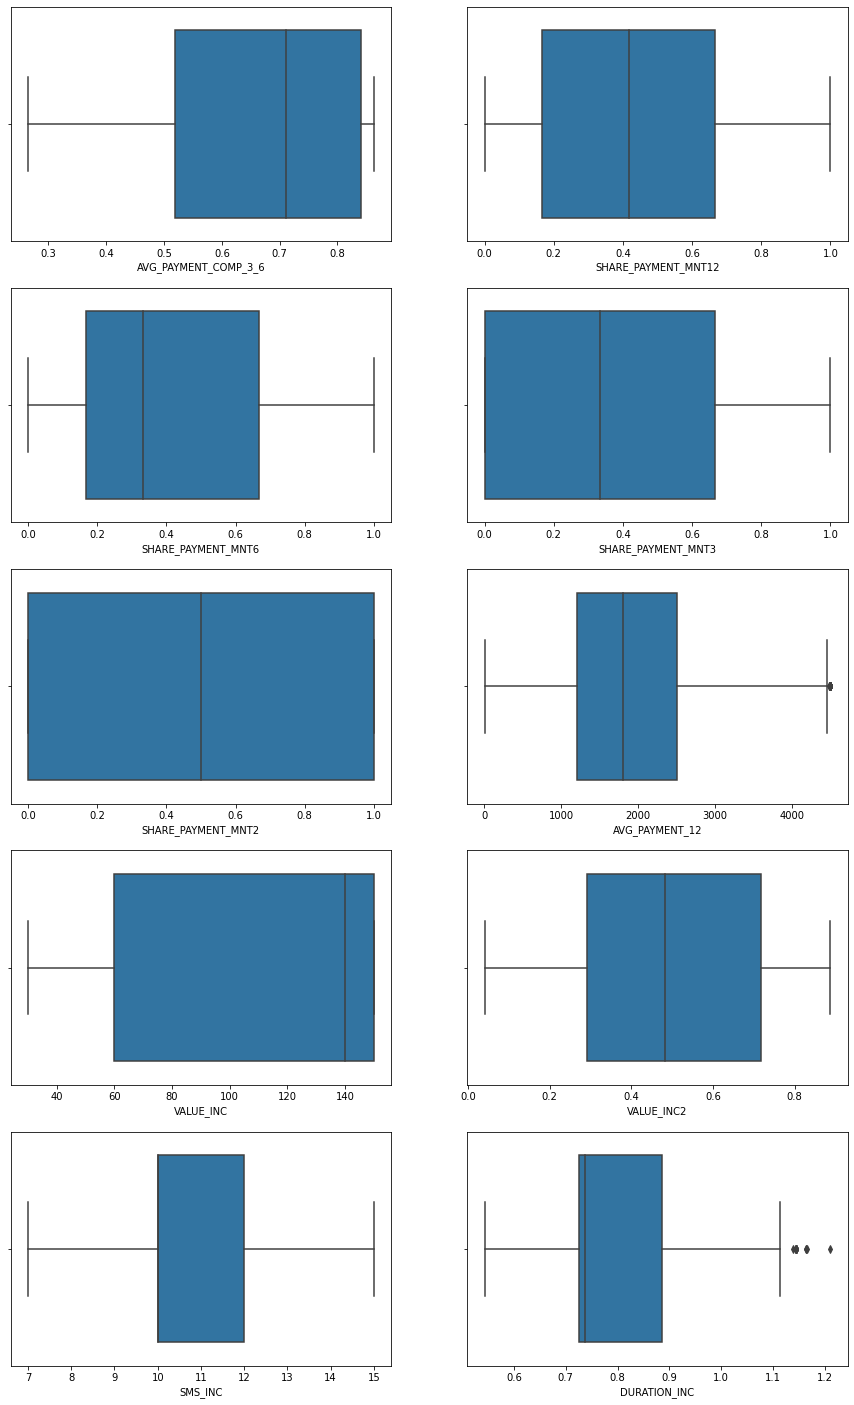

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

fig, axes = plt.subplots(5, 2, figsize = (15, 25))

num = 0
for i in data_copy.columns:
    if i not in ('PAY_LAST_MNT', 'TARGET'):
        sns.boxplot(x = data_copy[i], orient = "h", ax = axes[num // 2][num % 2]).set(xlabel = i)
        
        num += 1
        
        Q1_IQR, Q3_IQR = get_Q1_Q3_IDR(data_copy, i)
        data_copy = del_outliers(data_copy, Q1_IQR, Q3_IQR, i)

Как видно из графиков, у двух перменных были выбросы: 

$$\text{AVG_PAYMENT_12} = \text{среднемесячный платеж клиента, расчитанный по последнему году},$$ 

$$\text{DURATION_INC = во сколько раз увеличиваем продолжительность бесплатных минут разговора}.$$ 

После удаления выбросов, объём выборки уменьшился на $1\%$ с $44 200$ наблюдений до $43 599$.

In [14]:
data_copy.shape

(43599, 12)

### Обрабатываем пропуски

In [15]:
data_copy.isnull().sum()

TARGET                     0
AVG_PAYMENT_COMP_3_6       0
PAY_LAST_MNT               0
SHARE_PAYMENT_MNT12        0
SHARE_PAYMENT_MNT6         0
SHARE_PAYMENT_MNT3         0
SHARE_PAYMENT_MNT2         0
AVG_PAYMENT_12          3654
VALUE_INC                  0
VALUE_INC2                 0
SMS_INC                    0
DURATION_INC               0
dtype: int64

Пропуски присутствуют в переменной $\text{AVG_PAYMENT_12} = \text{среднемесячный платеж клиента, расчитанный по последнему году}$.

In [16]:
data_copy['AVG_PAYMENT_12'].fillna(round(data_copy['AVG_PAYMENT_12'].median()), inplace = True)

In [17]:
data_copy.isnull().sum()

TARGET                  0
AVG_PAYMENT_COMP_3_6    0
PAY_LAST_MNT            0
SHARE_PAYMENT_MNT12     0
SHARE_PAYMENT_MNT6      0
SHARE_PAYMENT_MNT3      0
SHARE_PAYMENT_MNT2      0
AVG_PAYMENT_12          0
VALUE_INC               0
VALUE_INC2              0
SMS_INC                 0
DURATION_INC            0
dtype: int64

Посмотрим еще раз на распределение значений этой переменной.

array([[<AxesSubplot:title={'center':'AVG_PAYMENT_12'}>]], dtype=object)

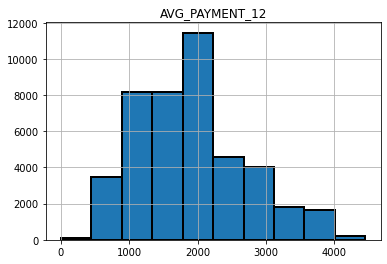

In [18]:
data_copy.hist("AVG_PAYMENT_12", edgecolor = 'black', linewidth = 2)

Удалим выбросы слева ($< 500$) и справа ($> 4 000$).

In [19]:
data_copy = data_copy[(data_copy['AVG_PAYMENT_12'] >= 500) & (data_copy['AVG_PAYMENT_12'] <= 4000)]

array([[<AxesSubplot:title={'center':'AVG_PAYMENT_12'}>]], dtype=object)

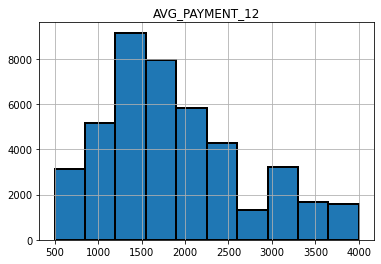

In [20]:
data_copy.hist("AVG_PAYMENT_12", edgecolor = 'black', linewidth = 2)

Объём выборки уменьшился на 345 записей ($0.7\%$)

In [21]:
data_copy.shape

(43254, 12)

### Приводим к одному масштабу

In [22]:
data_copy.describe()

,TARGET,AVG_PAYMENT_COMP_3_6,PAY_LAST_MNT,SHARE_PAYMENT_MNT12,SHARE_PAYMENT_MNT6,SHARE_PAYMENT_MNT3,SHARE_PAYMENT_MNT2,AVG_PAYMENT_12,VALUE_INC,VALUE_INC2,SMS_INC,DURATION_INC
count,43254.000000,43254.000000,43254.000000,43254.000000,43254.000000,43254.000000,43254.000000,43254.000000,43254.000000,43254.000000,43254.000000,43254.000000
mean,0.636889,0.637013,0.424238,0.423310,0.409366,0.421063,0.432642,1887.160298,109.690896,0.499687,10.524454,0.786121
std,0.480902,0.232221,0.494233,0.299640,0.339666,0.377355,0.415633,815.673857,45.821548,0.227020,1.407981,0.107010
min,0.000000,0.264608,0.000000,0.000000,0.000000,0.000000,0.000000,500.000000,30.000000,0.040816,7.000000,0.543182
25%,0.000000,0.519122,0.000000,0.166667,0.166667,0.000000,0.000000,1300.000000,60.000000,0.291667,10.000000,0.725806
50%,1.000000,0.711558,0.000000,0.416667,0.333333,0.333333,0.500000,1800.000000,140.000000,0.483271,10.000000,0.737903
75%,1.000000,0.840530,1.000000,0.666667,0.666667,0.666667,1.000000,2500.000000,150.000000,0.717703,12.002191,0.885081
max,1.000000,0.863048,1.000000,1.000000,1.000000,1.000000,1.000000,4000.000000,150.000000,0.887574,15.000000,1.113636


Масштаб трех признаков заметно выше чем у остальных:

$$
\text{AVG_PAYMENT_12} = \text{среднемесячный платеж клиента, расчитанный по последнему году},
$$

$$
\text{VALUE_INC} = \text{на сколько увеличиваем стоимость тарифа}, 
$$

$$
\text{SMS_INC} = \text{на сколько % увеличится количество бесплатных SMS}.
$$

Проведём стандартизацию данных признаков.

In [23]:
from sklearn.preprocessing import StandardScaler

scaled_features = StandardScaler().fit_transform(data_copy[['AVG_PAYMENT_12', 'VALUE_INC', 'SMS_INC']].values)

scaled_features_df = pd.DataFrame(scaled_features, index = data_copy.index, 
                                  columns = data_copy[['AVG_PAYMENT_12', 'VALUE_INC', 'SMS_INC']].columns)

data_copy = data_copy.drop(['AVG_PAYMENT_12', 'VALUE_INC', 'SMS_INC'], axis = 1).merge(scaled_features_df, 
                                                                                   left_index = True, 
                                                                                   right_index = True, how = 'left')

In [24]:
data_copy.describe()

,TARGET,AVG_PAYMENT_COMP_3_6,PAY_LAST_MNT,SHARE_PAYMENT_MNT12,SHARE_PAYMENT_MNT6,SHARE_PAYMENT_MNT3,SHARE_PAYMENT_MNT2,VALUE_INC2,DURATION_INC,AVG_PAYMENT_12,VALUE_INC,SMS_INC
count,43254.000000,43254.000000,43254.000000,43254.000000,43254.000000,43254.000000,43254.000000,43254.000000,43254.000000,4.325400e+04,4.325400e+04,4.325400e+04
mean,0.636889,0.637013,0.424238,0.423310,0.409366,0.421063,0.432642,0.499687,0.786121,1.432453e-16,1.757712e-17,3.170452e-16
std,0.480902,0.232221,0.494233,0.299640,0.339666,0.377355,0.415633,0.227020,0.107010,1.000012e+00,1.000012e+00,1.000012e+00
min,0.000000,0.264608,0.000000,0.000000,0.000000,0.000000,0.000000,0.040816,0.543182,-1.700651e+00,-1.739178e+00,-2.503225e+00
25%,0.000000,0.519122,0.000000,0.166667,0.166667,0.000000,0.000000,0.291667,0.725806,-7.198552e-01,-1.084456e+00,-3.724905e-01
50%,1.000000,0.711558,0.000000,0.416667,0.333333,0.333333,0.500000,0.483271,0.737903,-1.068580e-01,6.614673e-01,-3.724905e-01
75%,1.000000,0.840530,1.000000,0.666667,0.666667,0.666667,1.000000,0.717703,0.885081,7.513380e-01,8.797077e-01,1.049555e+00
max,1.000000,0.863048,1.000000,1.000000,1.000000,1.000000,1.000000,0.887574,1.113636,2.590330e+00,8.797077e-01,3.178734e+00


### Проверим корреляцию признаков

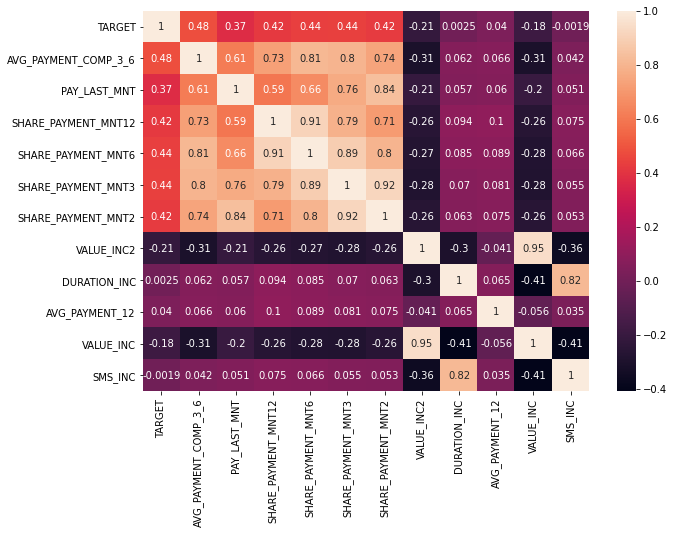

In [25]:
plt.subplots(figsize = (10, 7))
sns.heatmap(data_copy.corr(), annot = True)
plt.show()

1. Видим, что таргет слабо коррелирует с 3 признаками: 

$$\text{SMS_INC} = \text{на сколько % увеличится количество бесплатных SMS},$$ 

$$\text{AVG_PAYMENT_12} = \text{среднемесячный платеж клиента, расчитанный по последнему году},$$ 

$$\text{DURATION_INC = во сколько раз увеличиваем продолжительность бесплатных минут разговора}.$$

Удалим их.

In [26]:
data_copy.drop(['SMS_INC', 'AVG_PAYMENT_12', 'DURATION_INC'], inplace = True, axis = 1)

2. Видим, что есть много коррелирующих признаков. 

(a) Из пары 

$$\text{VALUE_INC} = \text{на сколько увеличиваем стоимость тарифа},$$ 
$$\text{VALUE_INC2} = \text{отношение величины увеличения к текущей стоимости обслуживания}.$$

сделаем новый признак. Если он окажется сильнее - оставим его, в противном случае, возьмем тот, что коррелирует с целевой переменной сильнее - $\text{VALUE_INC2}$.

Разобъем каждый из двух признаков на бакеты так, чтобы эти бакеты были монотонны по доле таргета (т.е. при возрастании верхней границы бакета доля таргета также возрастает или убывает). После этого, проведем пересечение полученных таким образом признаков и в каждом пересечении расчитаем долю таргета. Это и будет значением нового признака. 

Для разбиения переменных на бакеты воспользуемся функцией, предназанченное для расчета значимости переменной [Information value (IV)](https://www.listendata.com/2015/03/weight-of-evidence-woe-and-information.html). О том, что это такое поговорим немного позже. 

### Алгоритм разбиения на бакеты

Данная функция на вход принимает 6 параметров:
- Таблицу с данными

- Название целевой переменной

- Название признака, по которому необходимо провести разбиение на бакеты

- Флаг $\text{False}$ (если необходимо разбить на бакеты таким образом, что при возрастании границ бакета будет возрастать доля таргета в нем) и $\text{True}$ (здесь все наоборот, что при возрастании границ бакета, доля таргета будет убывать)

- Минимальный объем бакета

- Уровень значимости

Алгоритм следующий:
1. Все данные сортируются по значению признака, по которому проводим разбиение

2. На первом этапе количество бакетов равно количеству уникальных значений признака

3. Объединение соседних бакетов, если нарушено условие монотонности по доле целевой переменной

4.  Объединение соседних бакетов, если доля целевой переменной в них отличается незначимо

Более поробно может посмотреть в этой [статье](https://www.researchgate.net/publication/322520135_Monotone_optimal_binning_algorithm_for_credit_risk_modeling).

Разбиваем на бакеты перменные 

$$\text{VALUE_INC} = \text{на сколько увеличиваем стоимость тарифа}$$
$$\text{VALUE_INC2} = \text{отношение величины увеличения к текущей стоимости обслуживания}.$$

Берем флаг $\text{True}$, поскольку логично предположить, что чем меньше значение признака, тем больше доля таргета должна быть. 

In [27]:
import iv_woe

iv_woe1 = iv_woe.woe_calc(data_copy, 'TARGET', 'VALUE_INC', True, 1000, 0.05)
iv_woe1

,MIN_VALUE,MAX_VALUE,EVENT,NONEVENT,WOE,IV,VAR_NAME
0,-1.739178,-1.302697,4001,1073,0.754199,0.410315,VALUE_INC
1,-1.084456,0.661467,13462,3949,0.664521,0.410315,VALUE_INC
2,0.879708,0.879708,10085,10684,-0.619585,0.410315,VALUE_INC


In [28]:
iv_woe2 = iv_woe.woe_calc(data_copy, 'TARGET', 'VALUE_INC2', True, 1000, 0.05)
iv_woe2

,MIN_VALUE,MAX_VALUE,EVENT,NONEVENT,WOE,IV,VAR_NAME
0,0.040816,0.611706,17339,5041,0.673467,0.394524,VALUE_INC2
1,0.622010,0.887574,10209,10665,-0.605585,0.394524,VALUE_INC2


Пересекаем полученные бакеты и в каждом пересечении считаем долю таргета. Это и есть значения новой переменной.

In [29]:
min_val_inc_list = sorted(iv_woe1['MIN_VALUE'].values)
max_val_inc_list = sorted(iv_woe1['MAX_VALUE'].values)
min_val_inc2_list = sorted(iv_woe2['MIN_VALUE'].values)
max_val_inc2_list = sorted(iv_woe2['MAX_VALUE'].values)

data_copy['NEW_VALUE_INC'] = 0
for i1, j1 in zip(min_val_inc_list, max_val_inc_list):
    for i2, j2 in zip(min_val_inc2_list, max_val_inc2_list):
        
        avg = data_copy['TARGET'][(data_copy['VALUE_INC'] >= i1) &\
                                  (data_copy['VALUE_INC'] <= j1) &\
                                  (data_copy['VALUE_INC2'] >= i2) &\
                                  (data_copy['VALUE_INC2'] <= j2)].mean()        
        
        data_copy['NEW_VALUE_INC'][(data_copy['VALUE_INC'] >= i1) &\
                                 (data_copy['VALUE_INC'] <= j1) &\
                                 (data_copy['VALUE_INC2'] >= i2) &\
                                 (data_copy['VALUE_INC2'] <= j2)] = avg
        

(b) Из тройки 

$$\text{SHARE_PAYMENT_MNT2} = \text{доля месяцев, в которые были совершены платежи среди последних 2},$$ 
$$\text{SHARE_PAYMENT_MNT3} = \text{доля месяцев, в которые были совершены платежи среди последних 3},$$
$$\text{PAY_LAST_MNT} = \text{наличие платежа за последний месяц}$$ 

попытаемся сделать один признак, который будет содержать в себе информацию по каждому из них.

Для этого сначала получим вспомогательные переменные: $\text{PAY_LAST_MNT2}$ и $\text{PAY_LAST_MNT3}$ - был платеж в предпоследнем и предпредпоследнем месяце соответственно.

Таким образом, мы получим вектор в двоичной СС: 

$$
\Big(\text{PAY_LAST_MNT}, \quad \text{PAY_LAST_MNT2}, \quad \text{PAY_LAST_MNT3}\Big).
$$ 

Далее, переведем его в десятичнуюю СС:

$$
\text{PAY_LAST_MNT3_AGGR} = 2^{2} \cdot \text{PAY_LAST_MNT} + 2^{1} \cdot \text{PAY_LAST_MNT2} + 2^{0} \cdot \text{PAY_LAST_MNT3}.
$$

Далее из этих 4 признаков (3 старых и 1 новый) выберем тот, что сильнее коррелирует с таргетом.

In [30]:
def get_tr_mnt2(x, y):
    if (y == 1) or ((y == 0.5) and (x == 0)):
        return 1
    else:
        return 0
    
def get_tr_mnt3(x, y):
    if (y == 1) or ((y == 2.0 / 3) and (x == 1.0 / 2)) or ((y == 1.0 / 3) and (x == 0)):
        return 1
    else:
        return 0

data_copy['PAY_LAST_MNT2'] = data_copy.apply(lambda x: get_tr_mnt2(x['PAY_LAST_MNT'], x['SHARE_PAYMENT_MNT2']), axis = 1)
data_copy['PAY_LAST_MNT3'] = data_copy.apply(lambda x: get_tr_mnt3(x['SHARE_PAYMENT_MNT2'], x['SHARE_PAYMENT_MNT3']), axis = 1)

data_copy['PAY_LAST_MNT3_AGGR'] = 4 * data_copy['PAY_LAST_MNT'] + 2 * data_copy['PAY_LAST_MNT2'] + data_copy['PAY_LAST_MNT3']

data_copy.drop(['PAY_LAST_MNT2', 'PAY_LAST_MNT3'], axis = 1, inplace = True)

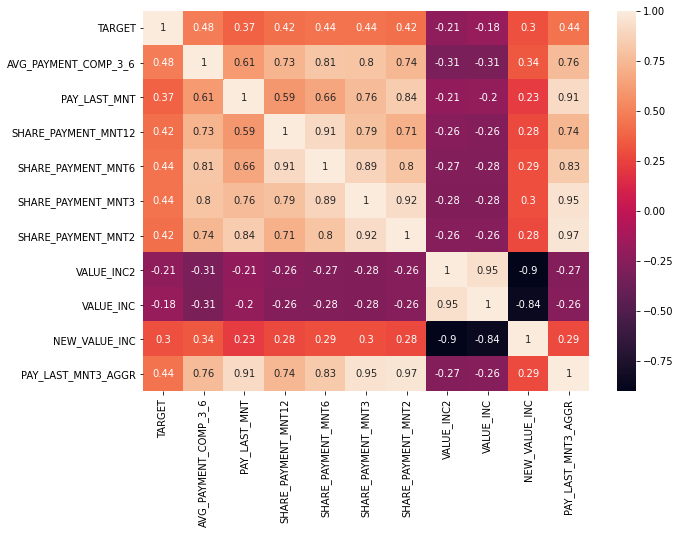

In [31]:
plt.subplots(figsize = (10, 7))
sns.heatmap(data_copy.corr(), annot = True)
plt.show()

Как видно из hitmap, в первом случае новый признак оказался сильнее двух старых. 

Во втором случае, оставим признак $\text{SHARE_PAYMENT_MNT3}$. Он не слабее нового, но при этом является более простым. 

In [32]:
data_copy.drop(['VALUE_INC', 'VALUE_INC2', 'PAY_LAST_MNT', 
                'SHARE_PAYMENT_MNT2', 'PAY_LAST_MNT3_AGGR'], inplace = True, axis = 1)

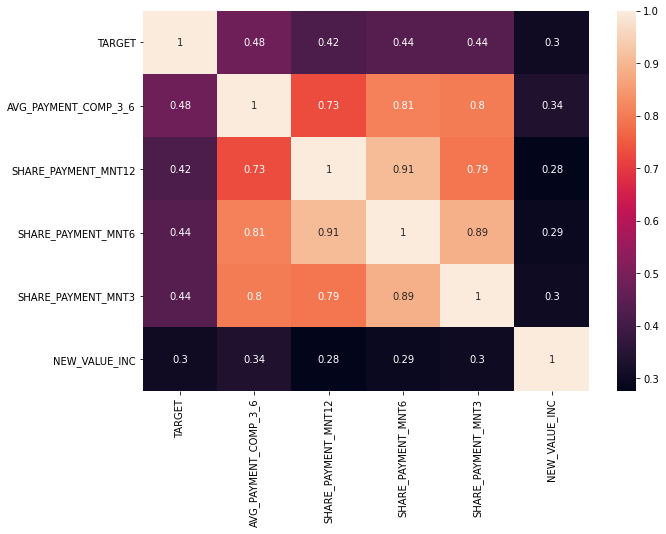

In [33]:
plt.subplots(figsize = (10, 7))
sns.heatmap(data_copy.corr(), annot = True)
plt.show()

(c) Из тройки

$$\text{SHARE_PAYMENT_MNT3} = \text{доля месяцев, в которые были совершены платежи среди последних 3},$$ 
$$\text{SHARE_PAYMENT_MNT6} = \text{доля месяцев, в которые были совершены платежи среди последних 6},$$ 
$$\text{SHARE_PAYMENT_MNT12} = \text{доля месяцев, в которые были совершены платежи среди последних 12}$$

получим новый признак по аналогии с пукнтом (a)

In [34]:
iv_woe1 = iv_woe.woe_calc(data_copy, 'TARGET', 'SHARE_PAYMENT_MNT3', False, 10000, 0.05)
iv_woe1

,MIN_VALUE,MAX_VALUE,EVENT,NONEVENT,WOE,IV,VAR_NAME
0,0.666667,1.000000,15057,2693,1.159300,1.005966,SHARE_PAYMENT_MNT3
1,0.333333,0.333333,7434,3126,0.304423,1.005966,SHARE_PAYMENT_MNT3
2,0.000000,0.000000,5057,9887,-1.232334,1.005966,SHARE_PAYMENT_MNT3


In [35]:
iv_woe2 = iv_woe.woe_calc(data_copy, 'TARGET', 'SHARE_PAYMENT_MNT6', False, 10000, 0.05)
iv_woe2

,MIN_VALUE,MAX_VALUE,EVENT,NONEVENT,WOE,IV,VAR_NAME
0,0.666667,1.0,12062,1959,1.255739,1.032432,SHARE_PAYMENT_MNT6
1,0.166667,0.6,12675,5953,0.193849,1.032432,SHARE_PAYMENT_MNT6
2,0.000000,0.0,2811,7794,-1.581701,1.032432,SHARE_PAYMENT_MNT6


In [36]:
iv_woe3 = iv_woe.woe_calc(data_copy, 'TARGET', 'SHARE_PAYMENT_MNT12', False, 5000, 0.05)
iv_woe3

,MIN_VALUE,MAX_VALUE,EVENT,NONEVENT,WOE,IV,VAR_NAME
0,0.777778,1.000000,5881,749,1.498856,0.6057,SHARE_PAYMENT_MNT12
1,0.625000,0.750000,4510,993,0.951435,0.6057,SHARE_PAYMENT_MNT12
2,0.500000,0.600000,4940,1469,0.650896,0.6057,SHARE_PAYMENT_MNT12
3,0.000000,0.454545,12217,12495,-0.584387,0.6057,SHARE_PAYMENT_MNT12


In [37]:
min_pay_mnt3_list = sorted(iv_woe1['MIN_VALUE'].values)
max_pay_mnt3_list = sorted(iv_woe1['MAX_VALUE'].values)
min_pay_mnt6_list = sorted(iv_woe2['MIN_VALUE'].values)
max_pay_mnt6_list = sorted(iv_woe2['MAX_VALUE'].values)
min_pay_mnt12_list = sorted(iv_woe3['MIN_VALUE'].values)
max_pay_mnt12_list = sorted(iv_woe3['MAX_VALUE'].values)

data_copy['NEW_SHARE_PAYMENT_MNT12'] = 0
for i1, j1 in zip(min_pay_mnt3_list, max_pay_mnt3_list):
    for i2, j2 in zip(min_pay_mnt6_list, max_pay_mnt6_list):
        for i3, j3 in zip(min_pay_mnt12_list, max_pay_mnt12_list):
        
            avg = data_copy['TARGET'][(data_copy['SHARE_PAYMENT_MNT3'] >= i1) &\
                                      (data_copy['SHARE_PAYMENT_MNT3'] <= j1) &\
                                      (data_copy['SHARE_PAYMENT_MNT6'] >= i2) &\
                                      (data_copy['SHARE_PAYMENT_MNT6'] <= j2) &\
                                      (data_copy['SHARE_PAYMENT_MNT12'] >= i3) &\
                                      (data_copy['SHARE_PAYMENT_MNT12'] <= j3)].mean()        

            data_copy['NEW_SHARE_PAYMENT_MNT12'][(data_copy['SHARE_PAYMENT_MNT3'] >= i1) &\
                                                 (data_copy['SHARE_PAYMENT_MNT3'] <= j1) &\
                                                 (data_copy['SHARE_PAYMENT_MNT6'] >= i2) &\
                                                 (data_copy['SHARE_PAYMENT_MNT6'] <= j2) &\
                                                 (data_copy['SHARE_PAYMENT_MNT12'] >= i3) &\
                                                 (data_copy['SHARE_PAYMENT_MNT12'] <= j3)] = avg
        

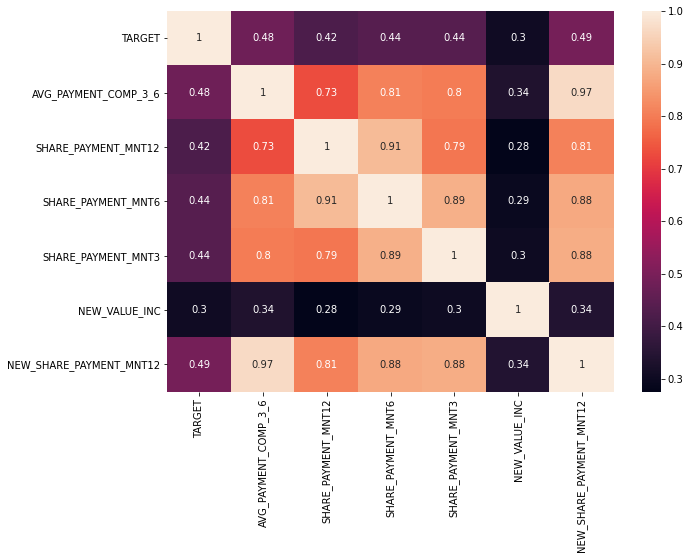

In [38]:
plt.subplots(figsize = (10, 7))
sns.heatmap(data_copy.corr(), annot = True)
plt.show()

Новый признак сильнее коррелирует с целевой переменной чем старые. Кроме того, коэффициент корреляции между этим признаком и признаком $\text{AVG_PAYMENT_COMP_3_6}$ близок к единице. 

В итоге, удалим 4 признака: 3 старых, из которых был получен $\text{NEW_SHARE_PAYMENT_MNT12}$ и $\text{AVG_PAYMENT_COMP_3_6}$.

In [39]:
data_copy.drop(['SHARE_PAYMENT_MNT3', 'SHARE_PAYMENT_MNT6', 'SHARE_PAYMENT_MNT12',
                'AVG_PAYMENT_COMP_3_6'], inplace = True, axis = 1)

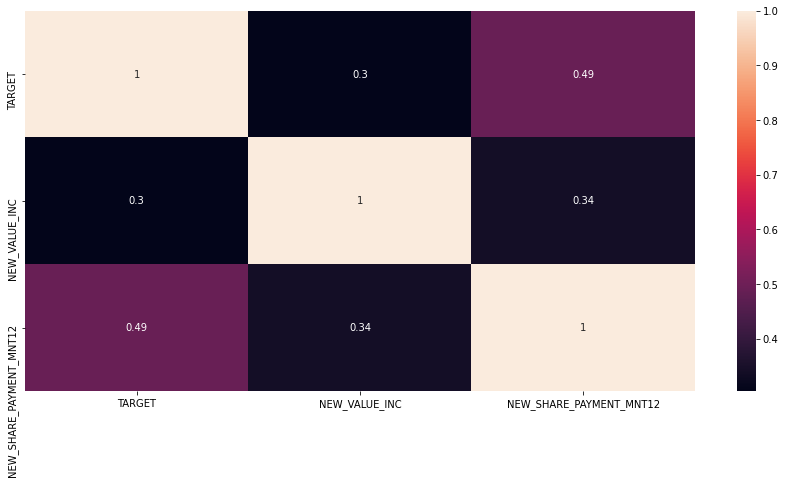

In [40]:
plt.subplots(figsize = (15, 7))
sns.heatmap(data_copy.corr(), annot = True)
plt.show()

### Построение модели

In [41]:
from sklearn.utils import shuffle
# Перемешаем данные и отделим целевую переменную от предикторов
data_copy = shuffle(data_copy, random_state = 123)

X = data_copy.drop(['TARGET'], 1)
Y = data_copy['TARGET']

In [42]:
from sklearn.model_selection import train_test_split

#Разделим выборку на две части 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 123)

 Построим модель и рассчитаем $\text{ROC AUC SCORE}$

In [43]:
from sklearn import linear_model
from sklearn.metrics import roc_auc_score

def build_model(model, modelName, X_train, Y_train, X_test, Y_test, peremList):
    model.fit(X_train, Y_train)
    
    pred_proba_train = model.predict_proba(X_train)
    roc_train = round(roc_auc_score(Y_train, pred_proba_train[:, 1]), 5)

    pred_proba_test = model.predict_proba(X_test)
    roc_test = round(roc_auc_score(Y_test, pred_proba_test[:, 1]), 5)

    
    print(10 * '-' + modelName + 10 * '*')
    for ind, perem in enumerate(peremList):     
        print(str(model.coef_[0][ind]) + ' * ' + perem + ' + ', end = '')
    print(model.intercept_[0])
    print('ROC TRAIN = {s[0]}   ROC TEST = {s[1]}'.format(s = [roc_train, roc_test]))
    print()


In [44]:
modelList = [linear_model.LogisticRegression(penalty = 'l2', C = 0.1, random_state = 1488),
             linear_model.LogisticRegression(penalty = 'l2', C = 1, random_state = 1488),
             linear_model.LogisticRegression(penalty = 'l2', C = 10, random_state = 1488),
             linear_model.LogisticRegression(penalty = 'none', random_state = 1488)]

modelNameList = ['REG L2 (C = 0.1)', 'REG L2 (C = 1)', 'REG L2 (C = 10)', 'NOT REG']

for model, modelName in zip(modelList, modelNameList):
    build_model(model, modelName, X_train, Y_train, X_test, Y_test, list(X_train.columns))

----------REG L2 (C = 0.1)**********
2.5357862232462507 * NEW_VALUE_INC + 4.092031629903582 * NEW_SHARE_PAYMENT_MNT12 + -3.5300988672850138
ROC TRAIN = 0.79005   ROC TEST = 0.79373

----------REG L2 (C = 1)**********
2.7072195200145424 * NEW_VALUE_INC + 4.201709223754549 * NEW_SHARE_PAYMENT_MNT12 + -3.702142067884259
ROC TRAIN = 0.78941   ROC TEST = 0.79355

----------REG L2 (C = 10)**********
2.726141258260137 * NEW_VALUE_INC + 4.213090687091537 * NEW_SHARE_PAYMENT_MNT12 + -3.7206854637935494
ROC TRAIN = 0.78941   ROC TEST = 0.79355

----------NOT REG**********
2.728265933224945 * NEW_VALUE_INC + 4.214360253385616 * NEW_SHARE_PAYMENT_MNT12 + -3.7227624577647194
ROC TRAIN = 0.78941   ROC TEST = 0.79355



Разделяющая сила всех моделей одинакова. Оставим модель без регуляризации и посмотрим, что получается на кросс - валидации 

In [45]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(linear_model.LogisticRegression(penalty = 'none', random_state = 1488), 
                            X_train, Y_train, 
                            cv = 5,
                            scoring = 'roc_auc')

for scores in cv_scores:
    print(scores)
print("Mean CV ROC AUC SCORE = %.4f" % np.mean(cv_scores))

0.7992236722010262
0.7800833232858384
0.7883591912348064
0.7888452018614189
0.790506895900201
Mean CV ROC AUC SCORE = 0.7894


Построим $\text{ROC}$ кривую и $\text{Precision - Recall}$ кривую в зависимости от границы отсечения. Также посмотрим как зависит $\text{F - Score}$ от отсечения. 

In [46]:
from sklearn.metrics import roc_curve, precision_recall_curve

model = linear_model.LogisticRegression(penalty = 'none', random_state = 1488)
model.fit(X_train, Y_train)

pred_proba_train = model.predict_proba(X_train)
pred_proba_test = model.predict_proba(X_test)
    
fpr_train, tpr_train, _ = roc_curve(Y_train, pred_proba_train[:, 1])
fpr_test, tpr_test, _ = roc_curve(Y_test, pred_proba_test[:, 1])

precision_test, recall_test, thresholds_test = precision_recall_curve(Y_test, pred_proba_test[:, 1])      
f1 = 2 * precision_test * recall_test  / (precision_test + recall_test)

# Берем beta меньше нуля, тем самым ставя точность приоритетнее полноты
beta = 0.5
f_beta = (1 + beta**2) * precision_test * recall_test  / (beta**2 * precision_test + recall_test)

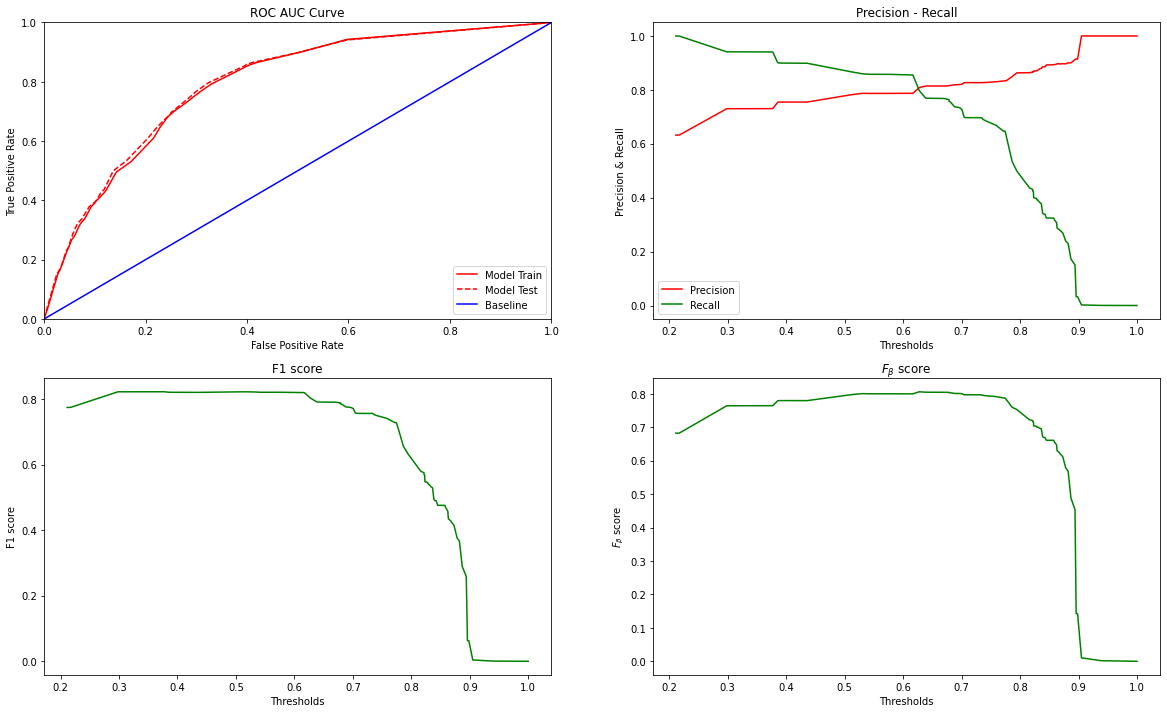

In [47]:
fig, axes = plt.subplots(2, 2, figsize = (20, 12))

axes[0][0].plot(fpr_train, tpr_train, 'r', label = 'Model Train')
axes[0][0].plot(fpr_test, tpr_test, 'r--', label = 'Model Test')
axes[0][0].plot([0, 1], [0, 1], 'b', label = 'Baseline')
axes[0][0].set_xlim([0.0, 1.0])
axes[0][0].set_ylim([0.0, 1.0])
axes[0][0].set_xlabel('False Positive Rate')
axes[0][0].set_ylabel('True Positive Rate')
axes[0][0].legend(loc = "lower right")
axes[0][0].set_title('ROC AUC Curve')


axes[0][1].plot(np.append(thresholds_test, 1.0), precision_test, 'r', label = 'Precision')
axes[0][1].plot(np.append(thresholds_test, 1.0), recall_test, 'g', label = 'Recall')
axes[0][1].set_xlabel('Thresholds')
axes[0][1].set_ylabel('Precision & Recall')
axes[0][1].legend(loc = "lower left")
axes[0][1].set_title('Precision - Recall')


axes[1][0].plot(np.append(thresholds_test, 1.0), f1, 'g')
axes[1][0].set_xlabel('Thresholds')
axes[1][0].set_ylabel('F1 score')
axes[1][0].set_title('F1 score')

axes[1][1].plot(np.append(thresholds_test, 1.0), f_beta, 'g')
axes[1][1].set_xlabel('Thresholds')
axes[1][1].set_ylabel(r'$F_{\beta}$' + ' score')
axes[1][1].set_title(r'$F_{\beta}$' + ' score')
       
plt.show()

Посмотрим чему равны $\text{Precision}$ и $\text{Recall}$ при максимальных значениях $F_{1} \text{ Score}$ и $F_{\beta} \text{ Score}$.

In [48]:
ind_max_f1 = np.where(f1 == max(f1))[0][0]
ind_max_f_beta = np.where(f_beta == max(f_beta))[0][0]

print('F1 Score = {s[0]}:  F_beta Score = {s[1]}  Recall = {s[2]}  Precision = {s[3]}'.\
     format(s = [round(f1[ind_max_f1], 3),
                 round(f_beta[ind_max_f1], 3),
                 round(recall_test[ind_max_f1], 3),
                 round(precision_test[ind_max_f1], 3)]))

print('F1 Score = {s[0]}:  F_beta Score = {s[1]}  Recall = {s[2]}  Precision = {s[3]}'.\
     format(s = [round(f1[ind_max_f_beta], 3),
                 round(f_beta[ind_max_f_beta], 3),
                 round(recall_test[ind_max_f_beta], 3),
                 round(precision_test[ind_max_f_beta], 3)]))

F1 Score = 0.822:  F_beta Score = 0.765  Recall = 0.94  Precision = 0.731
F1 Score = 0.803:  F_beta Score = 0.806  Recall = 0.797  Precision = 0.808


Сравним полученный результат с работой классификаторов, которые предсказывают только метки классов без вероятностей.

In [49]:
def build_model2(model, modelName, X_train, Y_train, X_test, Y_test):
    model.fit(X_train, Y_train)
    
    y_pred = model.predict(X_test)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    f_beta = fbeta_score(Y_test, y_pred, 0.5)
    
    print(10 * '-' + modelName + 10 * '-')
    print('F1 Score = {s[0]}:  F_beta Score = {s[1]}  Recall = {s[2]}  Precision = {s[3]}'.\
             format(s = [round(f1, 3), round(f_beta, 3), round(recall, 3), round(precision, 3)]))
    print()

In [50]:
modelList = [linear_model.RidgeClassifier(alpha = 0.1, random_state = 420),
             linear_model.SGDClassifier(max_iter = 1000, penalty = 'l2', alpha = 0.1, random_state = 420),
             linear_model.SGDClassifier(max_iter = 1000, penalty = 'l2', alpha = 0.01, random_state = 420),
             linear_model.SGDClassifier(max_iter = 1000, penalty = 'l1', l1_ratio = 0.01, random_state = 420)]

modelNameList = ['Ridge (alpha = 0.1)', 
                 'SGD (alpha = 0.1)', 
                 'SGD (alpha = 0.01)', 
                 'SGD (l1_ratio = 0.01)']

for model, modelName in zip(modelList, modelNameList):
    build_model2(model, modelName, X_train, Y_train, X_test, Y_test)

----------Ridge (alpha = 0.1)----------
F1 Score = 0.821:  F_beta Score = 0.797  Recall = 0.865  Precision = 0.782

----------SGD (alpha = 0.1)----------
F1 Score = 0.775:  F_beta Score = 0.682  Recall = 1.0  Precision = 0.632

----------SGD (alpha = 0.01)----------
F1 Score = 0.82:  F_beta Score = 0.797  Recall = 0.862  Precision = 0.782

----------SGD (l1_ratio = 0.01)----------
F1 Score = 0.82:  F_beta Score = 0.779  Recall = 0.897  Precision = 0.754



Посмотрим на точность предсказаний построив $\text{Gain Chart}$

In [51]:
prob_data = pd.DataFrame({'Probability': pred_proba_test[:, 1].tolist(), 'Fact': Y_test})
prob_data.sort_values(by = ['Probability'], inplace = True)

prob_data['Bucket'] = range(prob_data.shape[0])

cnt_buc = 10
cnt_elem = prob_data.shape[0]

def get_buc(x, cnt_buc, cnt_elem):
    return int(x * cnt_buc / cnt_elem) 

prob_data['Bucket'] = prob_data['Bucket'].apply(lambda x: get_buc(x, cnt_buc, cnt_elem))

prob_data = prob_data.groupby(by = 'Bucket').agg({'Probability': 'mean', 'Fact': 'mean'})
prob_data.reset_index(inplace = True)

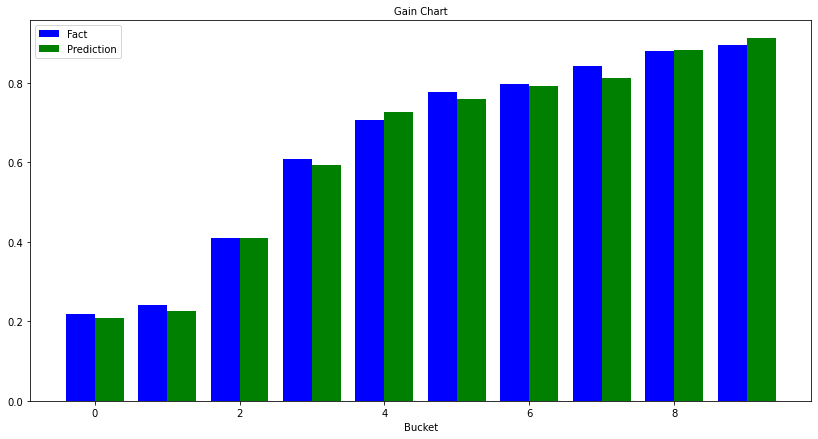

In [52]:
fig, axs = plt.subplots(figsize = (14, 7), nrows = 1, ncols = 1)

width = 0.4

pr = np.array([0.05, 0.2, 0.32, 0.4, 0.48, 0.53, 0.58, 0.65, 0.75, 0.9])
fact = np.array([0.06, 0.19, 0.315, 0.41, 0.47, 0.535, 0.577, 0.648, 0.751, 0.895])

axs.bar(prob_data['Bucket'] - width / 2, prob_data['Probability'], width, linewidth = 2, color = 'blue')
axs.bar(prob_data['Bucket'] + width / 2, prob_data['Fact'], width, linewidth = 4, color = 'green')


axs.set_title("Gain Chart", fontsize = 10)
axs.set_xlabel("Bucket", fontsize = 10)
axs.legend(['Fact', 'Prediction'])

plt.show()

- Факт распределен по бакетам монотонно. 


- В некоторых бакетах фактическая доля немного не сходится со средней вероятностью, но, в целом, все неплохо.


- Модель лучше выделяет клиентов, которые откажутся от предложения (два левых бакеты сильно отличаются от остальных. Про крайние правые бакеты такое сказать нельзя.)

### 9. Weight of evidence (WOE) and Information value (IV).

При решении задачи линейной классификации с помощью метода логистичекой регрессии полезно оперировать такими характеристиками как [Weight of evidence (WOE) and Information value (IV)](https://www.listendata.com/2015/03/weight-of-evidence-woe-and-information.html). Зачастую это позволяет очень сильно упростить этап Data Preparation. 

Впервые эти хараектеристики стали применяться при решении задачи *оценки кредитоспособности заемщика*. На сегодняшний день они используются и в других отраслях при решении задачи бинарной классификации методом логистической регресии.

$\text{IV}$ - это характеристика, показывающая разделяющую силу признака. Она всегда неотрицательна. Чем выше значение $\text{IV}$, тем сильнее признак. Как правило, для построения модели отбирают признаки, для которых $\text{IV} \ge 0.1$.

$\text{WOE}$ - это характеристика, отражающая влияние значений признака на наступление события.

Как рассчитываются данные величины:

1. Признак $\mathbf{x}_{i}$ разбивается на бакеты;


2. Для каждого полученного бакета рассчитывается $\text{WOE}$:

$$
\text{WOE}\Big(\mathbf{x}_{i}^{j}\Big) = \ln{\Bigg(\frac{\text{EVENTS}_{j}}{\text{NON EVENTS}_{j}}\Bigg)} - \ln{\Bigg(\frac{\text{EVENTS}}{\text{NON EVENTS}}\Bigg)},
$$

где $\text{EVENTS}_{j}$ - количество элементов класса 1 в рассматриваемом бакете,  $\text{EVENTS}$ - количество элементов класса 1 во всей выборке, $\text{NON EVENTS}_{j}$ - количество элементов класса -1 в рассматриваемом бакете,  $\text{NON EVENTS}$ - количество элементов класса -1 во всей выборке.

Таким образом, $\text{WOE}$ показывает насколько отличается логарифм шанса наступления целевого события в конкретном бакете от логарифма шанса наступления целевого события во всей выборке. Если $\text{WOE}$ положительное, то шанс наступления целевого события выше среднего. В противном случае - ниже.


3. После того, как был рассчитан $\text{WOE}$ можно рассчитать $\text{IV}$:

$$
\text{IV}\Big(\mathbf{x}_{i}\Big) = \sum\limits_{j = 1}^{m}\Bigg(\frac{\text{EVENTS}_{j}}{\text{EVENTS}} - \frac{\text{NON EVENTS}_{j}}{\text{NON EVENTS}}\Bigg) \cdot \text{WOE}\Big(\mathbf{x}_{i}^{j}\Big)
$$



Можно показать, что в случае условной независимости признаков (довольно жесткое условие, при решении задач достаточно линейной независимости), вероятность наступления целевого события выражается через рассчитанные $\text{WOE}$ значения:

$$
\mathbb{P}\Big(y = 1\Big|x_{1} = x_{1}^{j_{1}}, x_{2} = x_{2}^{j_{2}}, \dots, x_{k} = x_{k}^{j_{k}}\Big) = \frac{1}{1 + e^{-\text{logit}}},
$$

$$
\text{logit} = \ln{\Bigg(\frac{\mathbb{P}(y = 1)}{\mathbb{P}(y = -1)}\Bigg)} + \text{WOE}_{x_{1}^{j_{1}}} + \text{WOE}_{x_{2}^{j_{2}}} + \ldots + + \text{WOE}_{x_{k}^{j_{k}}}.
$$

### Домашнее задание

Функция для $\text{WOE}$ разбиения уже написана. Она возвращает таблицу со следующими данными:
- $\text{MIN_VALUE}$ и $\text{MAX_VALUE}$ - границы бакета;
- $\text{EVENT}$ и $\text{NONEVENT}$ - количество целевых и нецелевых событий в бакете;
- $\text{WOE}$ - рассчитанное $\text{WOE}$ значение по всем бакетам;
- $\text{IV}$ - рассчитанное $\text{IV}$ значение. Одинаково по всем бакетам поскольку считается по признаку в целом.
- $\text{VAR_NAME}$ - название переменной.

*Замечание 1*. Текущую реализацию функции можно применять к вещественным признакам или категориальным, в которых задан порядок.

*Замечание 2*. Перед применением функции не обязательно избавляться от пропусков. Они будут расценены как отдельный бакет.

*Замечание 3*. Из выражения для $\text{logit}$ следует, что проводить масштабирование признаков и анализ выбросов также не обязательно.

Вам необходимо:

1. Провести $\text{WOE}$ разбиение по каждому признаку. 
2. Отобрать значимые признаки по $\text{IV}$.
3. Заменить исходные значения признаков на полученные $\text{WOE}$ значения.  
4. Провести анализ зависимостей между полученными предикторами. Отбросить сильно зависимые (возможно добавить на основе существующих признаков новые).
5. Построить модель, оценить ее качество и сравнить с тем, что было получено на данном занятии.